In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)

METRICAS_RELEVANTES = ["weight", "fatRate", "muscleRate"]
COLORES = ["#30343F", "#89023E", "#EA638C"]

In [143]:
df = pd.read_csv("input/BODY.csv")

df["time"] = df["time"].str.replace("+0000", "")
df["time"] = pd.to_datetime(df["time"])
df["week"] = df["time"].dt.isocalendar().week
df["nombre_dia"] = df["time"].dt.day_name("es_MX")

In [166]:
FECHA_INICIAL = pd.to_datetime("01-10-2023", dayfirst=True)
FECHA_FINAL = pd.to_datetime("31-10-2023", dayfirst=True)

df_fecha = df[(df.time >= FECHA_INICIAL) & (df.time <= FECHA_FINAL)]

primera_fecha_mes = df_fecha.iloc[0][METRICAS_RELEVANTES]
ultima_fecha_mes = df_fecha.iloc[-1][METRICAS_RELEVANTES]
diferencia_primera_y_ultima_fecha = ultima_fecha_mes - primera_fecha_mes

In [167]:
promedios_por_semana = df_fecha.groupby("week")[METRICAS_RELEVANTES].mean()
promedios_por_semana.columns = promedios_por_semana.columns + "_promedios"

In [171]:
pesos_con_promedios = df_fecha.merge(
    promedios_por_semana, how="inner", left_on="week", right_index=True
).set_index("time")

,weight,fatRate,muscleRate,week,nombre_dia,weight_promedios,fatRate_promedios,muscleRate_promedios
time,,,,,,,,
2023-10-01 13:48:11,77.10,24.529846,55.225082,39,Domingo,77.100000,24.529846,55.225082
2023-10-02 09:56:40,77.50,24.824402,55.294888,40,Lunes,77.191667,24.638173,55.210983
2023-10-03 10:17:47,77.60,24.844988,55.351032,40,Martes,77.191667,24.638173,55.210983
2023-10-04 09:58:39,77.20,24.639004,55.216736,40,Miércoles,77.191667,24.638173,55.210983
2023-10-05 10:04:31,77.10,24.591583,55.179935,40,Jueves,77.191667,24.638173,55.210983
2023-10-06 10:06:50,76.95,24.471619,55.160210,40,Viernes,77.191667,24.638173,55.210983
2023-10-07 11:41:36,76.80,24.457440,55.063095,40,Sábado,77.191667,24.638173,55.210983
2023-10-10 10:07:34,77.85,24.826347,55.542990,41,Martes,77.290000,24.678565,55.251788
2023-10-11 10:10:11,77.45,24.770187,55.299057,41,Miércoles,77.290000,24.678565,55.251788


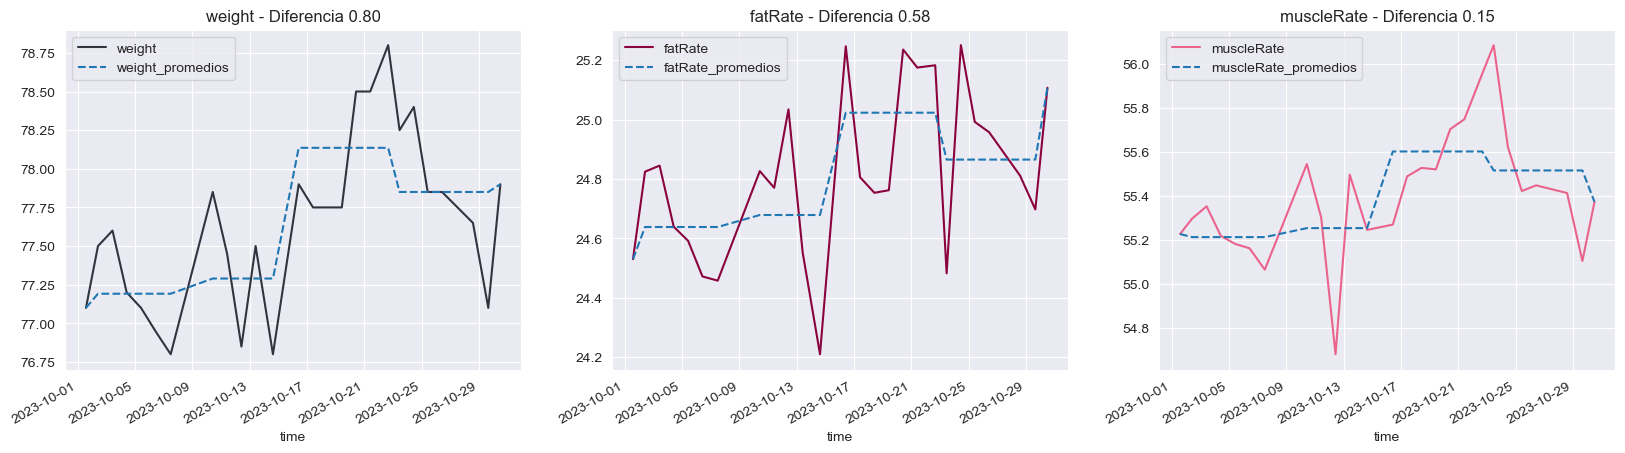

In [180]:
COLS_A_MOSTRAR = METRICAS_RELEVANTES + ["week", "nombre_dia"] + list(promedios_por_semana.columns)
display(pesos_con_promedios[COLS_A_MOSTRAR])

fig, axis = plt.subplots(1, 3, figsize=(20, 5))
for i, metrica in enumerate(METRICAS_RELEVANTES):
    pesos_con_promedios.plot(
        y=metrica,
        ax=axis[i],
        title=f"{metrica} - Diferencia {diferencia_primera_y_ultima_fecha[metrica]:.2f}",
        color=COLORES[i],
    )
    
    pesos_con_promedios.plot(y=f"{metrica}_promedios", style="--", ax=axis[i])

plt.show()

In [33]:
def obtener_primer_y_ultima_fecha_df(df):
    primera_semana_mes = calculo_pesos.iloc[0]["weight"]
    ultima_semana_mes = calculo_pesos.iloc[-1]["weight"]
    diferencia = ultima_semana_mes - primera_semana_mes



print(
    f"> El peso de la primera semana del mes fue: {primera_semana_mes:.2f}\n"
    f"> El peso de la ultima semana del mes fue: {ultima_semana_mes:.2f}\n"
    f">> La diferencia entre la primera y ultima semana del mes fue: {diferencia:.2f}"
)

> El peso de la primera semana del mes fue: 77.10
> El peso de la ultima semana del mes fue: 77.90
>> La diferencia entre la primera y ultima semana del mes fue: 0.80
